### Preprocessing

In [1]:
from tqdm import tqdm
from utils.utils import *

import networkx as nx
import random

random.seed(42)

/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/li

In [2]:
exp = "exp5"
groups_id = ['s_WT', 's_zwf1^']
subgroups_id = {'s_WT': ['1', '2', '3', '4', '5'], 's_zwf1^': ['1', '2', '3']}

N° nodes:	10
N° edges:	17
Radius:		2
Diameter:	3
Density:	0.37777777777777777


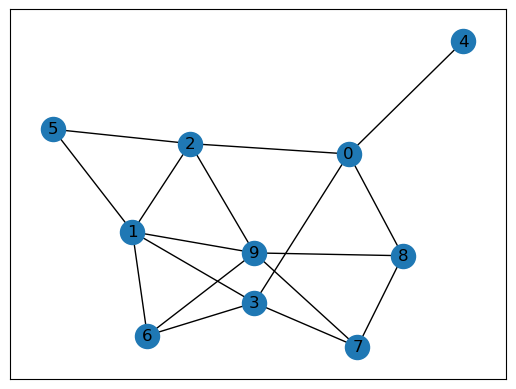

In [3]:
G = nx.gnp_random_graph(10, 0.3, 42, False)
info_graph(G)
nx.draw_networkx(G)

In [4]:
for group in groups_id:
    print("Group: ", group)
    graphs = []
    for k, subgroup in enumerate(subgroups_id[group]):
        # G = nx.gnp_random_graph(1000 + (n_graphs - k) * 20, 0.1, 42, False)
        # G = nx.gnp_random_graph(1000, 0.2 + k*0.05, 42, False)
        G = nx.gnp_random_graph(1000, 0.3, 42 + k, False)

        for (u, v) in G.edges():
            G.edges[u, v]["weight"] = random.uniform(0.5, 1)
        graphs.append(G)
        
        df_edges = nx.to_pandas_edgelist(G)
        # df_edges.to_csv("output/{}/preprocessing/edges/edges_{}_{}.csv".format(exp, group, subgroup), index=False)

        print(k + 1, G.number_of_nodes(), G.number_of_edges(), nx.density(G))

    R = nx.intersection_all(graphs)
    df_common_edges = nx.to_pandas_edgelist(R)
    # df_common_edges.to_csv("output/{}/common_edges/common_edges_{}_{}_{}.csv".format(exp, "nx", group, ""), index=False)
    S = nx.from_pandas_edgelist(df_common_edges, "source", "target")

    print("R", R.number_of_nodes(), R.number_of_edges(), nx.density(R))
    print("S", S.number_of_nodes(), S.number_of_edges(), nx.density(S))
    print()

Group:  s_WT
1 1000 149559 0.2994174174174174
2 1000 149971 0.3002422422422422
3 1000 149221 0.29874074074074075
4 1000 150271 0.30084284284284285
5 1000 149539 0.29937737737737735
R 1000 1247 0.0024964964964964967
S 902 1247 0.0030687755167330705

Group:  s_zwf1^
1 1000 149559 0.2994174174174174
2 1000 149971 0.3002422422422422
3 1000 149221 0.29874074074074075
R 1000 13664 0.027355355355355354
S 1000 13664 0.027355355355355354



In [5]:
# create dataset - nodes/edge data for DGL framework

create_graph_data(exp, groups_id, subgroups_id)

100%|██████████| 2/2 [00:07<00:00,  3.60s/it]


In [6]:
create_graph_data_other(exp, groups_id, subgroups_id, option="dyn")

100%|██████████| 2/2 [00:11<00:00,  5.69s/it]


In [7]:
create_graph_data_other(exp, groups_id, subgroups_id, option="str")

100%|██████████| 2/2 [00:11<00:00,  5.61s/it]
